# 1. Import Required Libraries and Functions

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import json
import datetime
from datetime import datetime as dt

# 2. Web Scraping Module

In [2]:
def scrape_article_ids(api_url, max_pages):
    job_id =[]
    titles = []
    companies = []
    locations = []
    categorys= []
    subCategorys= []
    job_types=[]
    salarys=[]
    listing_dates=[]
    for page_number in range(1, max_pages + 1):
        page_url = f'{api_url}&page={page_number}'
        
        # Send an HTTP request to the API endpoint
        response = requests.get(api_url)
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Extract advertiser IDs from each item in the 'data' list
            for item in data['data']:
                jid = item['id']
                title = item['title']
                company = item['advertiser'].get('description', '')
                location = item.get('locations', '')[0].get('label', '')
                category = item['classifications'][0]['classification'].get('description', '')
                subCategory= item['classifications'][0]['subclassification'].get('description', '')
                job_type = item.get('workTypes', '')[0]
                salary = item.get('salaryLabel', '')
                listing_date = item.get('listingDate', '')

                job_id.append(jid)
                titles.append(title)
                companies.append(company)
                locations.append(location)
                categorys.append(category)
                subCategorys.append(subCategory)
                job_types.append(job_type)
                salarys.append(salary)
                listing_dates.append(listing_date)

        else:
            print(f"Failed to retrieve data from the API. Status Code: {response.status_code}")
            break

    return job_id, titles, companies, locations, categorys, subCategorys, job_types, salarys, listing_dates

# 3. Data Collection

In [3]:
# api url taken from Network -> Header 
api_url = 'https://sg.jobstreet.com/api/jobsearch/v5/search?siteKey=SG-Main&sourcesystem=houston&userqueryid=6a42d7b95a919398223f7ac86dc06816-9046136&userid=885b2b0b-d4f9-45ab-b16e-5037f5e754d0&usersessionid=885b2b0b-d4f9-45ab-b16e-5037f5e754d0&eventCaptureSessionId=885b2b0b-d4f9-45ab-b16e-5037f5e754d0&page=1&keywords=Data+Analyst&pageSize=32&include=seodata,relatedsearches,gptTargeting,pills&baseKeywords=Data+Analyst&locale=en-SG&solId=6bdfabec-ef07-4d8c-9597-843f54181fed&relatedSearchesCount=12&queryHints=spellingCorrection'
max_pages = 5

job_id, titles, companies, locations, categorys, subCategorys,job_types,salarys, listing_dates = scrape_article_ids(api_url, max_pages)

data_df = pd.DataFrame(
    {'job_id': job_id,
     'Title': titles,
     'Company': companies,
     'Location': locations,
     'Catagory': categorys,
     'Sub Catagory': subCategorys,
     'Job Type': job_types,
     'Salary': salarys,
     'Listing Date': listing_dates
    })

Date of collection: 07 May 2025

# 4. Data Preprocessing (Date-Time)

In [4]:
date_list = []
time_list = []
for i in range(0, len(data_df['Listing Date'])):
    a = data_df['Listing Date'][i]
    a1 = a.replace('T', ' ')
    a2 = a1.replace('Z', '')
    x = dt.strptime(a2, '%Y-%m-%d %H:%M:%S')
    y = datetime.datetime(x.year, x.month, x.day)
    date_list.append(y)
data_df['Listing Date']= date_list

In [5]:
data_df.head(10)

,job_id,Title,Company,Location,Catagory,Sub Catagory,Job Type,Salary,Listing Date
0,84053134,Data Market Analyst,TechM Solution Pte. Ltd.,"Raffles Place, Central Region",Marketing & Communications,Market Research & Analysis,Full time,,2025-05-07
1,84033896,Data analyst [Town] [Bank],Talentvis Singapore Pte Ltd,"Raffles Place, Central Region",Banking & Financial Services,Analysis & Reporting,Full time,,2025-05-06
2,83978246,Data Analyst,Private Advertiser,"Upper Thomson, Central Region",Information & Communication Technology,Business/Systems Analysts,Full time,"$4,000 – $5,000 per month",2025-05-03
3,84018353,Business Data Analyst,Private Advertiser,Singapore,Sales,New Business Development,Full time,"$5,500 – $7,500 per month",2025-05-06
4,83890718,Research Data Analyst - Contract,PERSOLKELLY Singapore Pte Ltd (Formerly Kelly ...,Central Region,Consulting & Strategy,Analysts,Contract/Temp,"$4,000 – $5,500 per month",2025-04-29
5,84031875,Data Analyst Engineer (Yishun),Murata Electronics Singapore (Pte.) Ltd.,"Yishun, North Region",Information & Communication Technology,Engineering - Software,Full time,"$3,900 – $4,800 per month",2025-05-06
6,83689550,"Data Analyst, Management Information",Sengkang General Hospital Pte. Ltd.,"Sengkang, North-East Region",Information & Communication Technology,Database Development & Administration,Full time,,2025-04-21
7,83891612,Data Analyst/Business Analyst,VTECH GLOBAL PTE. LTD.,"Downtown Core, Central Region",Banking & Financial Services,Analysis & Reporting,Full time,,2025-04-29
8,83970703,Data Analyst / Research Assistant (Public Agen...,ScienTec Consulting Pte Ltd,Central Region,Healthcare & Medical,Clinical/Medical Research,Full time,"$4,000 – $5,000 per month",2025-05-02
9,83810844,Data Analyst,China Telecom (Asia Pacific) Pte Ltd,"Raffles Place, Central Region",Information & Communication Technology,Business/Systems Analysts,Full time,,2025-04-25


# 5. Exploratory Data Analysis

<Axes: ylabel='count'>

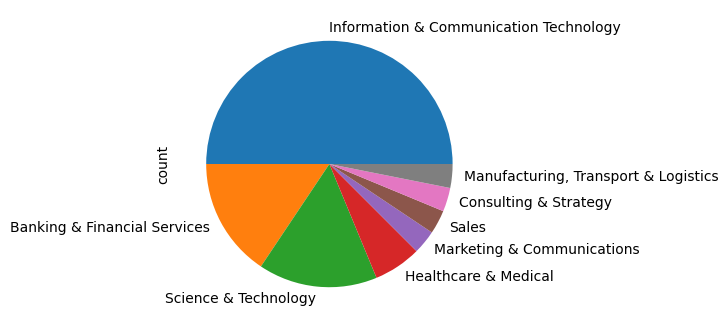

In [6]:
data_df['Catagory'].value_counts().plot(kind = "pie", figsize = (8, 4))

<Axes: xlabel='Sub Catagory'>

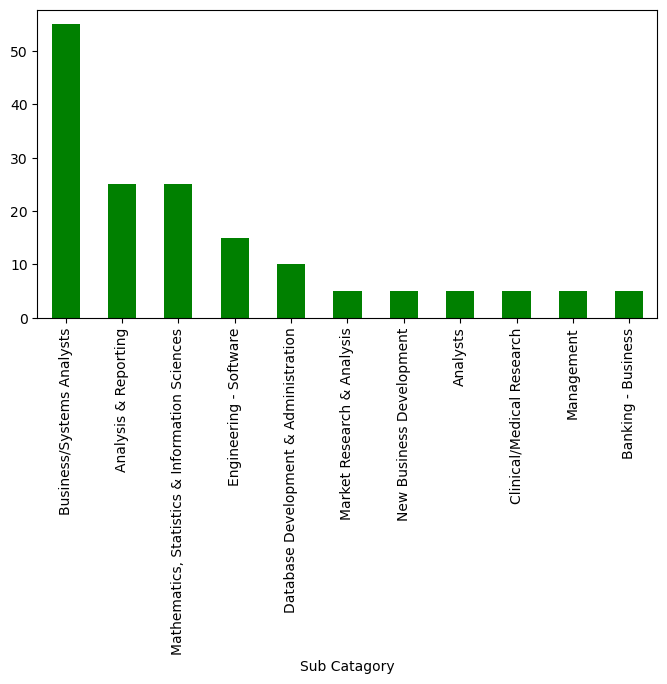

In [7]:
data_df['Sub Catagory'].value_counts().plot(kind = "bar", figsize = (8, 4), color = "green")

<Axes: ylabel='count'>

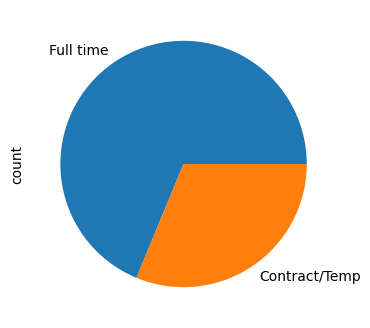

In [8]:
data_df['Job Type'].value_counts().plot(kind = "pie", figsize = (8, 4))

<Axes: xlabel='Listing Date'>

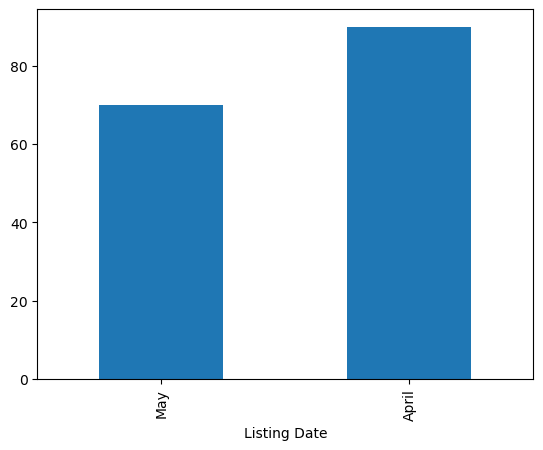

In [9]:
data_df['job_id'].groupby([data_df['Listing Date'].dt.month_name()], sort=False).count().plot(kind='bar')

In [10]:
duplicates = data_df['job_id'].duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
155     True
156     True
157     True
158     True
159     True
Name: job_id, Length: 160, dtype: bool

In [11]:
data_df_unique = data_df.drop_duplicates()

In [12]:
data_df_unique

,job_id,Title,Company,Location,Catagory,Sub Catagory,Job Type,Salary,Listing Date
0,84053134,Data Market Analyst,TechM Solution Pte. Ltd.,"Raffles Place, Central Region",Marketing & Communications,Market Research & Analysis,Full time,,2025-05-07
1,84033896,Data analyst [Town] [Bank],Talentvis Singapore Pte Ltd,"Raffles Place, Central Region",Banking & Financial Services,Analysis & Reporting,Full time,,2025-05-06
2,83978246,Data Analyst,Private Advertiser,"Upper Thomson, Central Region",Information & Communication Technology,Business/Systems Analysts,Full time,"$4,000 – $5,000 per month",2025-05-03
3,84018353,Business Data Analyst,Private Advertiser,Singapore,Sales,New Business Development,Full time,"$5,500 – $7,500 per month",2025-05-06
4,83890718,Research Data Analyst - Contract,PERSOLKELLY Singapore Pte Ltd (Formerly Kelly ...,Central Region,Consulting & Strategy,Analysts,Contract/Temp,"$4,000 – $5,500 per month",2025-04-29
5,84031875,Data Analyst Engineer (Yishun),Murata Electronics Singapore (Pte.) Ltd.,"Yishun, North Region",Information & Communication Technology,Engineering - Software,Full time,"$3,900 – $4,800 per month",2025-05-06
6,83689550,"Data Analyst, Management Information",Sengkang General Hospital Pte. Ltd.,"Sengkang, North-East Region",Information & Communication Technology,Database Development & Administration,Full time,,2025-04-21
7,83891612,Data Analyst/Business Analyst,VTECH GLOBAL PTE. LTD.,"Downtown Core, Central Region",Banking & Financial Services,Analysis & Reporting,Full time,,2025-04-29
8,83970703,Data Analyst / Research Assistant (Public Agen...,ScienTec Consulting Pte Ltd,Central Region,Healthcare & Medical,Clinical/Medical Research,Full time,"$4,000 – $5,000 per month",2025-05-02
9,83810844,Data Analyst,China Telecom (Asia Pacific) Pte Ltd,"Raffles Place, Central Region",Information & Communication Technology,Business/Systems Analysts,Full time,,2025-04-25


<Axes: ylabel='count'>

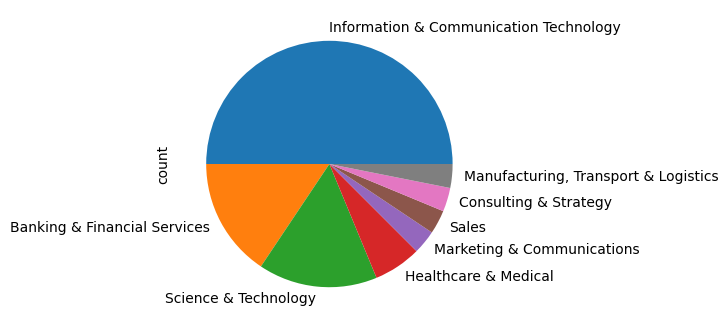

In [13]:
data_df_unique['Catagory'].value_counts().plot(kind = "pie", figsize = (8, 4))

While most data analyst roles are in the ICT and Finance industries as expected, nearly a quarter of roles available are also within the science, technology, and healthcare industries, potentially due to the increase in demand for big data solutions and machine learning applications in those fields.

<Axes: xlabel='Sub Catagory'>

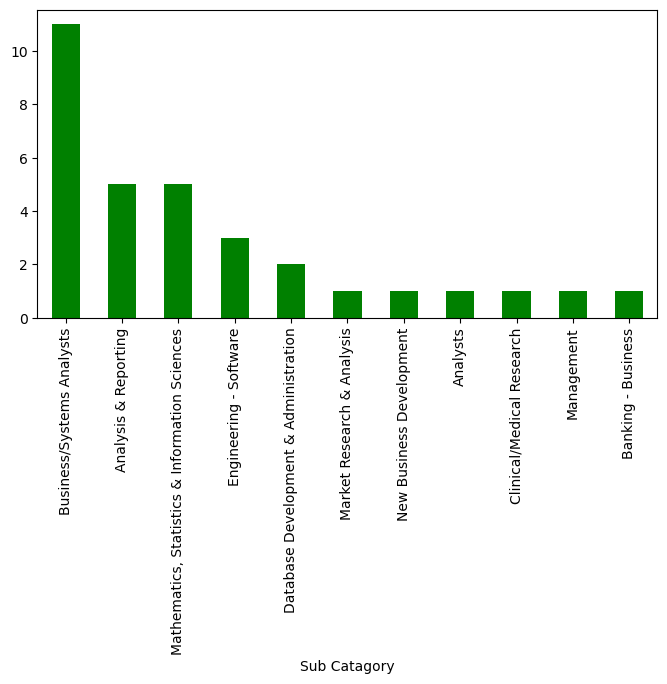

In [14]:
data_df_unique['Sub Catagory'].value_counts().plot(kind = "bar", figsize = (8, 4), color = "green")

Despite the large number of science, tech, and healthcare category roles, only one role for clinical/medical research was present within the last two months, likely indicating that the requirement for data analysts even in the science, tech, and healthcare roles are for business, finance and other administrative purposes.

<Axes: ylabel='count'>

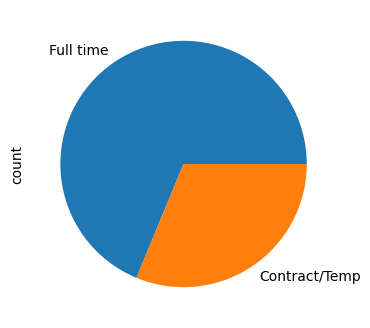

In [15]:
data_df_unique['Job Type'].value_counts().plot(kind = "pie", figsize = (8, 4))

Majority of the jobs being offered currently are of fulltime basis, but a surprisingly large percentage of jobs are only contract based or a temp position